# Comparaisons de WordCloud

In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from utils.preprocessing_cleaned_data import *
from utils.swSets import *
from sklearn import naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [2]:
def getTfidfDataFrame(corpus, my_stopwords=None, my_tokenizer=None):
    vectorizer = TfidfVectorizer(stop_words = my_stopwords, tokenizer=my_tokenizer)
    X = vectorizer.fit_transform(corpus)
    return pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names()), vectorizer.get_feature_names()

def getTfDataFrame(corpus, my_stopwords=None, my_tokenizer=None):
    vectorizer = CountVectorizer(stop_words = my_stopwords, tokenizer=my_tokenizer)
    X = vectorizer.fit_transform(corpus)
    return pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [3]:
path = "/Vrac/PLDAC_addic7ed/cleaned_data20"
d_info, d_name = getDicts(path)

corpus = get_corpus(path, texts_as="shows")
X = getTfidfSparseMat(corpus, my_stopwords = stopwords_set)

Y = list(d_name.keys())

df, names = getTfidfDataFrame(corpus, stopwords_set)
df_tf = getTfDataFrame(corpus, stopwords_set)

In [4]:
# SVM instanciation - Linear
lsvm_clf = svm.LinearSVC()
lsvm_clf.fit(X, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
coef = lsvm_clf.coef_
for serie in range(0, len(coef)) :
    l = list(coef[serie])
    i = l.index(max(l))
    nomSerie = d_name[serie+1]
    print('Pour la série '+str(nomSerie)+', \n \tle mot le plus important est : '+str(names[i])+'\n')

Pour la série 10___Smallville, 
 	le mot le plus important est : clark

Pour la série 122___Malcolm_In_The_Middle, 
 	le mot le plus important est : malcolm

Pour la série 12___Doctor_Who, 
 	le mot le plus important est : doctor

Pour la série 132___NCIS, 
 	le mot le plus important est : gibbs

Pour la série 15___House, 
 	le mot le plus important est : cuddy

Pour la série 16___Desperate_Housewives, 
 	le mot le plus important est : lynette

Pour la série 186___American_Dad, 
 	le mot le plus important est : francine

Pour la série 2381___Scandal, 
 	le mot le plus important est : liv

Pour la série 24___Scrubs, 
 	le mot le plus important est : turk

Pour la série 28___Bones, 
 	le mot le plus important est : hodgins

Pour la série 30___Grey_s_Anatomy, 
 	le mot le plus important est : dr

Pour la série 3103___House_of_Cards_(2013), 
 	le mot le plus important est : president

Pour la série 32___Veronica_Mars, 
 	le mot le plus important est : veronica

Pour la série 366___True_Blo

## WordCloud pour la série Smallville 

### Par TF

Les mots apparaissant en gros sont les mots avec le plus grand nombre d'occurences dans la série.

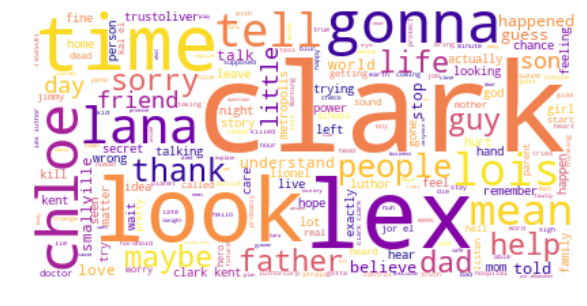

In [18]:
text = corpus[0]
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white", stopwords=stopwords_set, colormap='plasma').generate(text)

# Display the generated image:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
wordcloud.to_file("img/tf.png")

### Par TF-IDF

Les mots apparaissant en gros sont les mots avec le plus grand tf-idf.

In [20]:
d_freq = dict()
d = df.iloc[0]
for mot in names :
    d_freq[mot] = d[mot]

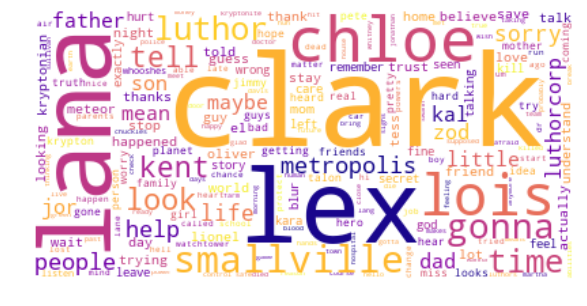

In [21]:
wordcloud = WordCloud(background_color="white", stopwords=stopwords_set, colormap='plasma')
wordcloud.generate_from_frequencies(frequencies=d_freq)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
wordcloud.to_file("img/tf_idf.png")

### Par coef du SVM

Les mots apparaissant en gros sont les mots avec le plus grand coef dans les paramètres du SVM.

In [23]:
d_coef = dict()
d = df.iloc[0]
for i in range(0, len(names)) :
    d_coef[names[i]] = coef[0][i]

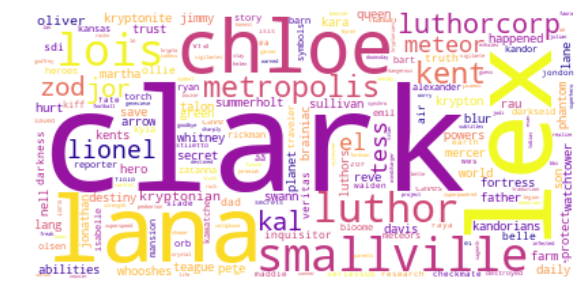

In [24]:
wordcloud = WordCloud(background_color="white", stopwords=stopwords_set, colormap='plasma')
wordcloud.generate_from_frequencies(frequencies=d_coef)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
wordcloud.to_file("img/coef.png")

## Conclusion

Les wordclouds sont tous très similaires. On remarque tout de même que les mots les plus importants en terme de tf-idf et des coefs du SVM sont plus similaires entre eux qu'avec le tf.

Les mots les plus présents sont les noms propres, ce qui était attendu. 

Pour palier ce problème, plusieurs solutions s'offrent à nous :
- NER (Named Entity Recognition) : malheureusement, assez peu efficace avec nos corpus. En effet, nous travaillons avec du texte en minuscule et nous n'avons pas réussi à trouver un bon tagger.
- retirer les mots avec les plus grands tf-idf (par exemple retirer les 5 mots dont les tf-idf sont les plus grands pour chaque série) mais on se heurte à un autre problème : on risque de retirer des mots très pertinents.

What to do, what to do...